In [15]:
import sys

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

from evaluation.deviations_evalaution_metrics import load_results, DeviationEvaluation

In [16]:
# Load deviation prediction results:
path_pred_deviations = "../2_conformance_prediction/results/Sepsis/deviation_predictions.pkl"

# Evaluation deviation labels

In [17]:
deviation_results_evaluation = load_results(path=path_pred_deviations)
eval = DeviationEvaluation(deviation_results=deviation_results_evaluation)

In [18]:
# Only evaluate labels that are in the target set!
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_dev()
print("Precision macro dev: ", precision_macro)
print("Precision macro dev per label: ", precision_per_label)
print("Recall macro dev: ", recall_macro)
print("Recall macro dev per label: ", recall_per_label)

Precision macro dev:  0.22638920780926808
Precision macro dev per label:  {('>>', 'Admission IC'): 0.182175622542595, ('>>', 'Admission NC'): 0, ('>>', 'CRP'): 0.0392156862745098, ('>>', 'ER Sepsis Triage'): 0.017857142857142856, ('>>', 'ER Triage'): 0.006329113924050633, ('>>', 'Lactic Acid'): 1.0, ('>>', 'Leukocytes'): 1.0, ('>>', 'Release C'): 0.17258883248730963, ('Admission IC', '>>'): 0.025025025025025027, ('Admission NC', '>>'): 0.2684630738522954, ('CRP', '>>'): 0.0, ('ER Registration', '>>'): 0.0, ('ER Triage', '>>'): 0.00513347022587269, ('IV Antibiotics', '>>'): 0.12420382165605096, ('IV Liquid', '>>'): 0.013157894736842105, ('LacticAcid', '>>'): 0.4152588555858311, ('Leucocytes', '>>'): 0.8055972013993004, ('Release B', '>>'): 0}
Recall macro dev:  0.5354912820974888
Recall macro dev per label:  {('>>', 'Admission IC'): 0.7595628415300546, ('>>', 'Admission NC'): 0.0, ('>>', 'CRP'): 0.6666666666666666, ('>>', 'ER Sepsis Triage'): 0.875, ('>>', 'ER Triage'): 1.0, ('>>', 'Lac

In [19]:
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_no_dev()
print("Precision macro no dev: ", precision_macro)
print("Precision macro per label no dev: ", precision_per_label)
print("Recall macro no dev: ", recall_macro)
print("Recall macro per label no dev: ", recall_per_label)

Precision macro no dev:  0.9734386816507734
Precision macro per label no dev:  {('>>', 'Admission IC'): 0.9663093415007658, ('>>', 'Admission NC'): 0.9975833736104398, ('>>', 'CRP'): 0.9989832231825114, ('>>', 'ER Sepsis Triage'): 0.9994036970781157, ('>>', 'ER Triage'): 1.0, ('>>', 'Lactic Acid'): 0.9858712715855573, ('>>', 'Leukocytes'): 0.9858712715855573, ('>>', 'Release C'): 0.9248985115020297, ('Admission IC', '>>'): 1.0, ('Admission NC', '>>'): 0.9846153846153847, ('CRP', '>>'): 0.9995147986414362, ('ER Registration', '>>'): 0.999507631708518, ('ER Triage', '>>'): 0.9917355371900827, ('IV Antibiotics', '>>'): 0.9441595441595442, ('IV Liquid', '>>'): 0.987012987012987, ('LacticAcid', '>>'): 0.7863247863247863, ('Leucocytes', '>>'): 0.9705882352941176, ('Release B', '>>'): 0.9995166747220879}
Recall macro no dev:  0.6661286834308472
Recall macro per label no dev:  {('>>', 'Admission IC'): 0.6691410392364793, ('>>', 'Admission NC'): 1.0, ('>>', 'CRP'): 0.9524963645176927, ('>>', 'E

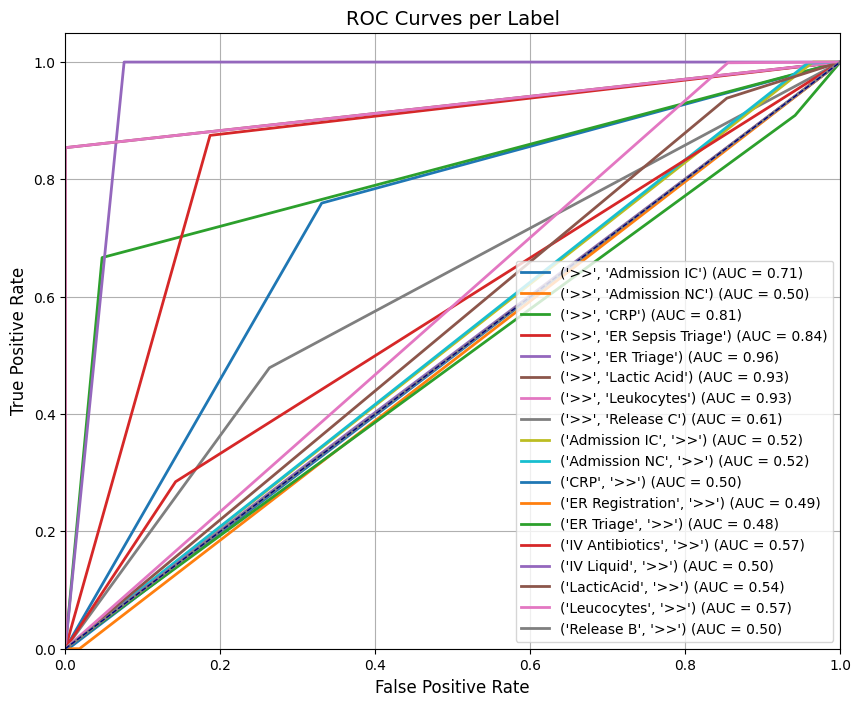

ROC_AUC macro dev:  0.6382774769495092
ROC_AUC macro dev per label:  {('>>', 'Admission IC'): 0.7143519403832671, ('>>', 'Admission NC'): 0.5, ('>>', 'CRP'): 0.8095815155921796, ('>>', 'ER Sepsis Triage'): 0.8440987384764678, ('>>', 'ER Triage'): 0.9620406189555126, ('>>', 'Lactic Acid'): 0.9270270270270271, ('>>', 'Leukocytes'): 0.9270270270270271, ('>>', 'Release C'): 0.6077017059252064, ('Admission IC', '>>'): 0.517582961862308, ('Admission NC', '>>'): 0.5199873888949519, ('CRP', '>>'): 0.49806576402321084, ('ER Registration', '>>'): 0.49081237911025144, ('ER Triage', '>>'): 0.48369997349589183, ('IV Antibiotics', '>>'): 0.5711659941666289, ('IV Liquid', '>>'): 0.5015416984075162, ('LacticAcid', '>>'): 0.5424019579027397, ('Leucocytes', '>>'): 0.5719078938409794, ('Release B', '>>'): 0.5}


In [20]:
roc_auc_macro, roc_auc_per_label = eval.roc_auc_macro_by_label()
print("ROC_AUC macro dev: ", roc_auc_macro)
print("ROC_AUC macro dev per label: ", roc_auc_per_label)

# Evaluation sequences

In [21]:
# Evaluation of the 

tgt_suff_dev_pos, pred_suff_dev_pos, real_tgt_suffixes, real_pred_suffix_samples = eval.get_suffix_devs()

case_level, per_label_mean, weighted_macro = eval.likelihood_at_target_positions(tgt_suff_dev_poss=tgt_suff_dev_pos, pred_suff_dev_poss=pred_suff_dev_pos)

print("likelihood at correct position in suffix for all deviations: ", per_label_mean)
print("mean likelihood of deviations' correct poistion across all deviations: ", weighted_macro)

print("min:", min(list(per_label_mean.values())))
print("max:", max(list(per_label_mean.values())))

likelihood at correct position in suffix for all deviations:  {'Admission IC': 0.7286695278969956, 'Admission NC': 0.08719591457753018, 'CRP': 0.24000000000000002, 'ER Registration': 0.0, 'ER Sepsis Triage': 0.66875, 'ER Triage': 0.22166666666666668, 'IV Antibiotics': 0.042262773722627746, 'IV Liquid': 0.06407407407407407, 'Lactic Acid': 0.8540540540540541, 'LacticAcid': 0.10878353087960074, 'Leucocytes': 0.10927591881513987, 'Leukocytes': 0.8540540540540541, 'Release B': 0.0, 'Release C': 0.44845070422535216}
mean likelihood of deviations' correct poistion across all deviations:  0.15994215236847847
min: 0.0
max: 0.8540540540540541


# Evaluation unseen deviation labels